# <font color='darkred'>Financial Inclusion in Africa</font>

### <font color='darkblue'>Project: Create ML model to predict which individuals are most likely to have or use a bank account</font>

### <font color='darkblue'>Elaborated by: Rhili Nacef</font>

## <font color='darkred'>Index</font>

##### <font color='darkblue'>Introduction</font>
##### <font color='darkblue'>1. Import Librairies</font>
##### <font color='darkblue'>2. Load Dataset</font>
##### <font color='darkblue'>3. Exploratory Data Analysis</font>
##### <font color='darkblue'>4. Data Preprocessing</font>
    4.1. Data Cleaning
    4.2. Features Engineering
    4.3. Handling Outliers
##### <font color='darkblue'>5. Building the Model</font>
    5.1. Split the dataset
    5.2. RandomForestClassifier
    5.3. AdaBoostClassifier
    5.4. GradientBoostingClassifier
    5.5. ROC curve
    5.6. Exporting Pickle Dump Files

## Introduction

In this checkpoint, we are going to work on the 'Financial Inclusion in Africa' dataset that was provided as part of the Financial Inclusion in Africa hosted by the Zindi platform.

Dataset description: The dataset contains demographic information and what financial services are used by approximately 33,600 individuals across East Africa. The ML model role is to predict which individuals are most likely to have or use a bank account.

The term financial inclusion means:  individuals and businesses have access to useful and affordable financial products and services that meet their needs – transactions, payments, savings, credit and insurance – delivered in a responsible and sustainable way.

###### Variable Definitions
* country: Country interviewee is in.
* year: Year survey was done in.
* uniqueid: Unique identifier for each interviewee
* location_type: "Type of location: Rural, Urban"
* cellphone_access: "If interviewee has access to a cellphone: Yes, No"
* household_size: Number of people living in one house
* age_of_respondent: The age of the interviewee
* gender_of_respondent: "Gender of interviewee: Male, Female"
* relationship_with_head: "The interviewee’s relationship with the head of the house:Head of Household, Spouse, Child, Parent, Other relative, Other non-relatives, Dont know"
* marital_status: "The martial status of the interviewee: Married/Living together, Divorced/Seperated, Widowed, Single/Never Married, Don’t know"
* education_level: "Highest level of education: No formal education, Primary education, Secondary education, Vocational/Specialised training, Tertiary education, Other/Dont know/RTA"
* job_type: "Type of job interviewee has: Farming and Fishing, Self employed, Formally employed Government, Formally employed Private, Informally employed, Remittance Dependent, Government Dependent, Other Income, No Income, Dont Know/Refuse to answer"


## 1. Import Librairies

In [39]:
import numpy as np
import pandas as pd
import webbrowser
import sweetviz as sv
import ydata_profiling as ydt
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc
import pickle


import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=DeprecationWarning)

## 2. Load Dataset

In [2]:
df = pd.read_csv("Financial_inclusion_dataset.csv")

In [3]:
# Print first 5 rows of the dataset
df.head(5).style.background_gradient(cmap="Blues")

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed


In [4]:
# Print first 5 rows of the dataset
df.tail(5).style.background_gradient(cmap="Blues")

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
23519,Uganda,2018,uniqueid_2113,No,Rural,Yes,4,48,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,uniqueid_2114,No,Rural,Yes,2,27,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,uniqueid_2115,No,Rural,Yes,5,27,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018,uniqueid_2116,No,Urban,Yes,7,30,Female,Parent,Divorced/Seperated,Secondary education,Self employed
23523,Uganda,2018,uniqueid_2117,No,Rural,Yes,10,20,Male,Child,Single/Never Married,Secondary education,No Income


## 3. Exploratory Data Analysis

### 3.1. Columns of the dataset

In [5]:
# Give statistical information about numerical columns in the DataFrame
df.describe().T.style.background_gradient(cmap="Greens")

,count,mean,std,min,25%,50%,75%,max
year,23524.000000,2016.975939,0.847371,2016.000000,2016.000000,2017.000000,2018.000000,2018.000000
household_size,23524.000000,3.797483,2.227613,1.000000,2.000000,3.000000,5.000000,21.000000
age_of_respondent,23524.000000,38.805220,16.520569,16.000000,26.000000,35.000000,49.000000,100.000000


In [6]:
# Give information such as number of rows, columns, column data types, non-null values etc.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   country                 23524 non-null  object
 1   year                    23524 non-null  int64 
 2   uniqueid                23524 non-null  object
 3   bank_account            23524 non-null  object
 4   location_type           23524 non-null  object
 5   cellphone_access        23524 non-null  object
 6   household_size          23524 non-null  int64 
 7   age_of_respondent       23524 non-null  int64 
 8   gender_of_respondent    23524 non-null  object
 9   relationship_with_head  23524 non-null  object
 10  marital_status          23524 non-null  object
 11  education_level         23524 non-null  object
 12  job_type                23524 non-null  object
dtypes: int64(3), object(10)
memory usage: 2.3+ MB


In [7]:
# Numbers of unique values
df.nunique()

country                      4
year                         3
uniqueid                  8735
bank_account                 2
location_type                2
cellphone_access             2
household_size              20
age_of_respondent           85
gender_of_respondent         2
relationship_with_head       6
marital_status               5
education_level              6
job_type                    10
dtype: int64

### 3.2. Preliminary Reports

In [8]:
# Create a Preliminary DataViz report to gain insights into the dataset
my_report = sv.analyze(df)
my_report.show_html()

                                             |                                                                …

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [9]:
# Create a Preliminary pandas profiling report to gain insights into the dataset
profile = ydt.ProfileReport(df)
profile.to_file("YDT_REPORT.html")
webbrowser.open_new('file://C:/Users/rhili/YDT_REPORT.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

True

## 4. Data Preprocessing

### 4.1. Data Cleaning

##### Handling Missing Values

In [10]:
# Check for missing values
df.isnull().sum()

country                   0
year                      0
uniqueid                  0
bank_account              0
location_type             0
cellphone_access          0
household_size            0
age_of_respondent         0
gender_of_respondent      0
relationship_with_head    0
marital_status            0
education_level           0
job_type                  0
dtype: int64

##### Handling Duplicates

In [11]:
# Check for duplicate values
df.duplicated().sum()

0

### 4.2. Feature Engineering

In [12]:
df.nunique()

country                      4
year                         3
uniqueid                  8735
bank_account                 2
location_type                2
cellphone_access             2
household_size              20
age_of_respondent           85
gender_of_respondent         2
relationship_with_head       6
marital_status               5
education_level              6
job_type                    10
dtype: int64

In [13]:
df = df.drop('uniqueid', axis=1)

In [14]:
# Creating Encoding dictionaries for Binary Data
encoding_yesno = {'Yes':1, 'No':0}
encoding_location = {'Urban':0, 'Rural':1}
encoding_gender = {'Male':0, 'Female':1}

In [15]:
# LabelEncoding on Categorical Features
le_country = LabelEncoder()
le_relationship_with_head = LabelEncoder()
le_marital_status = LabelEncoder()
le_education_level = LabelEncoder()
le_job_type = LabelEncoder()

df['country'] = le_country.fit_transform(df['country'])
df['bank_account'] = df['bank_account'].map(encoding_yesno)
df['location_type'] = df['location_type'].map(encoding_location)
df['cellphone_access'] = df['cellphone_access'].map(encoding_yesno)
df['gender_of_respondent'] = df['gender_of_respondent'].map(encoding_gender)
df['relationship_with_head'] = le_relationship_with_head.fit_transform(df['relationship_with_head'])
df['marital_status'] = le_marital_status.fit_transform(df['marital_status'])
df['education_level'] = le_education_level.fit_transform(df['education_level'])
df['job_type'] = le_job_type.fit_transform(df['job_type'])

In [16]:
df

,country,year,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,0,2018,1,1,1,3,24,1,5,2,3,9
1,0,2018,0,1,0,5,70,1,1,4,0,4
2,0,2018,1,0,1,5,26,0,3,3,5,9
3,0,2018,0,1,1,5,34,1,1,2,2,3
4,0,2018,0,0,0,8,26,0,0,3,2,5
...,...,...,...,...,...,...,...,...,...,...,...,...
23519,3,2018,0,1,1,4,48,1,1,0,0,7
23520,3,2018,0,1,1,2,27,1,1,3,3,7
23521,3,2018,0,1,1,5,27,1,4,4,2,7
23522,3,2018,0,0,1,7,30,1,4,0,3,9


### 4.3. Handling Outliers

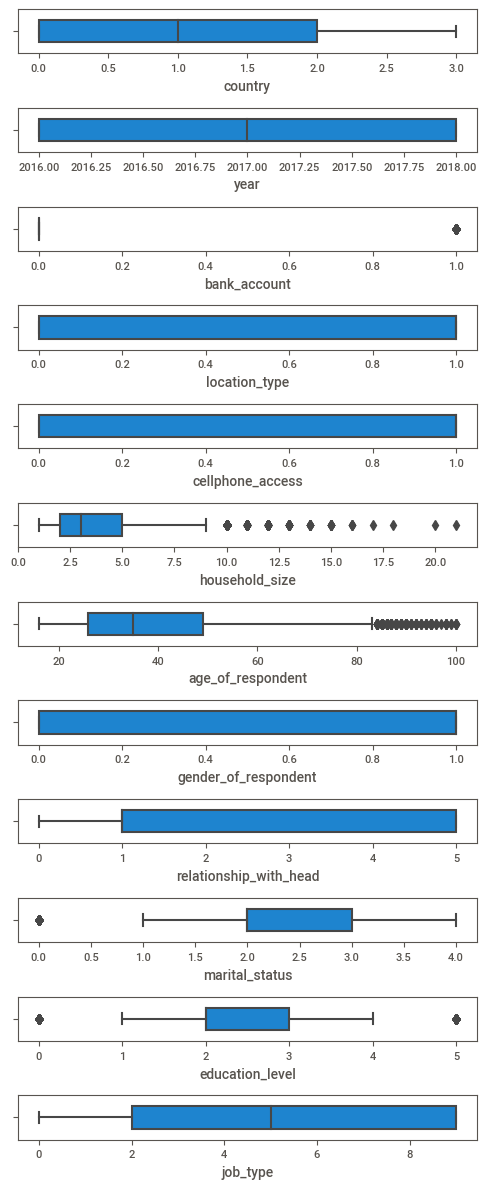

In [17]:
# Create a boxplot with subplots

columns = df.columns

fig, axs = plt.subplots(len(columns), figsize=(5,len(columns)))

for i, column in enumerate(columns) :
    sns.boxplot(x=df[column], width=0.5, ax=axs[i])

plt.tight_layout()
plt.show()

In [26]:
# Delete Rows where 'age_of_respondent' > 85 OR 'household_size' >9
df = df[(df['age_of_respondent'] <= 85) & (df['household_size'] <= 9)]

In [27]:
df = df.reset_index(drop=True)

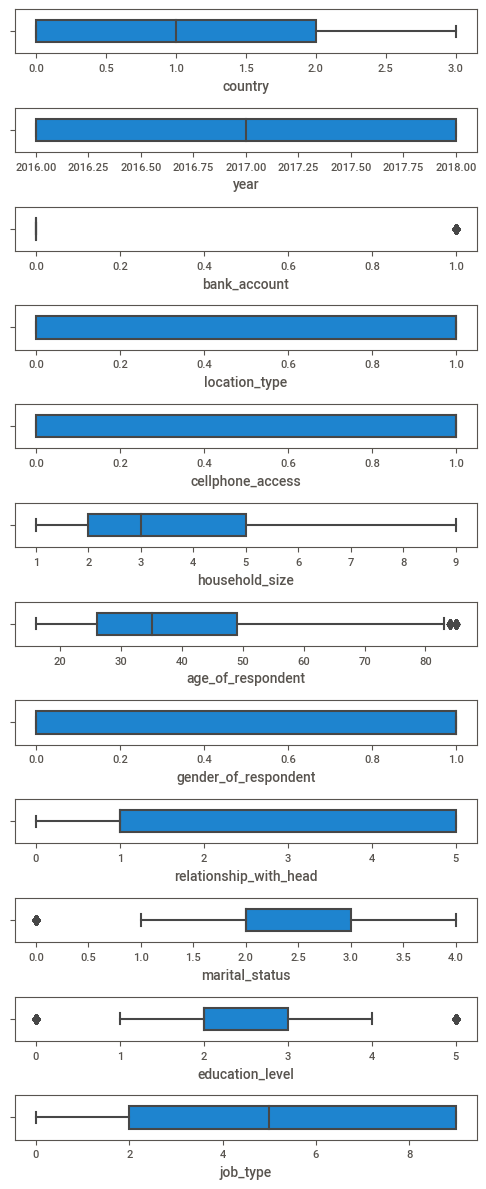

In [29]:
# Re-Create the boxplot to 

columns = df.columns

fig, axs = plt.subplots(len(columns), figsize=(5,len(columns)))

for i, column in enumerate(columns) :
    sns.boxplot(x=df[column], width=0.5, ax=axs[i])

plt.tight_layout()
plt.show()

## 5. Building the Model

### 5.1. Split the dataset

In [30]:
# Defining Features and Target variables
X = df.drop('bank_account', axis=1)
y = df['bank_account']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 5.2. RandomForestClassifier

In [37]:
# Apply Random Forest Classifier
# Create a classifier
rfc = RandomForestClassifier()

# Train the model using the training sets
rfc.fit(X_train, y_train)

# Predict the response for test dataset
y_pred = clf.predict(X_test)

# Assess model performance
print("score:{}".format(accuracy_score(y_test, y_pred)))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

score:0.8716275021758051
Confusion Matrix:
 [[3740  219]
 [ 371  266]]


### 5.3. AdaBoostClassifier

In [33]:
# Apply Ada Boost Classifier
# Create a classifier
abc = AdaBoostClassifier()

# Train the model using the training sets
abc.fit(X_train, y_train)

# Predict the response for test dataset
abc_pred = abc.predict(X_test)

# Assess model performance
print("score:{}".format(accuracy_score(y_test, abc_pred)))
print("Confusion Matrix:\n", confusion_matrix(y_test, abc_pred))

score:0.8905570060922542
Confusion Matrix:
 [[3857  102]
 [ 401  236]]


### 5.4. GradientBoostingClassifier

In [34]:
# Apply Gradient Boosting Classifier
# Create a classifier
gbc = GradientBoostingClassifier()

# Train the model using the training sets
gbc.fit(X_train, y_train)

# Predict the response for test dataset
gbc_pred = gbc.predict(X_test)

# Assess model performance
print("score:{}".format(accuracy_score(y_test, gbc_pred)))
print("Confusion Matrix:\n", confusion_matrix(y_test, gbc_pred))

score:0.891644908616188
Confusion Matrix:
 [[3873   86]
 [ 412  225]]


### 5.5. ROC curve

In [40]:
# Predict probabilities
y_score1 = rfc.predict_proba(X_test)[:,1]

y_score2 = abc.predict_proba(X_test)[:,1]

y_score3 = gbc.predict_proba(X_test)[:,1]

# Compute ROC curve and ROC area
fpr1, tpr1, _ = roc_curve(y_test, y_score1)
roc_auc1 = auc(fpr1, tpr1)

fpr2, tpr2, _ = roc_curve(y_test, y_score2)
roc_auc2 = auc(fpr2, tpr2)

fpr3, tpr3, _ = roc_curve(y_test, y_score3)
roc_auc3 = auc(fpr3, tpr3)

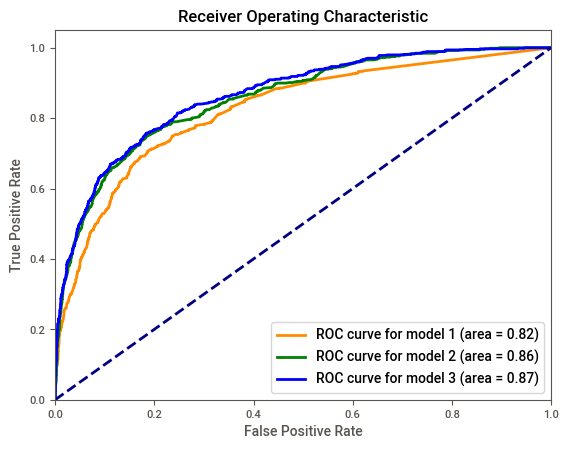

In [41]:
# Plot ROC Curve
plt.figure()
lw = 2
plt.plot(fpr1, tpr1, color='darkorange', lw=lw, label='ROC curve for model 1 (area = %0.2f)' % roc_auc1)
plt.plot(fpr2, tpr2, color='green', lw=lw, label='ROC curve for model 2 (area = %0.2f)' % roc_auc2)
plt.plot(fpr3, tpr3, color='blue', lw=lw, label='ROC curve for model 3 (area = %0.2f)' % roc_auc3)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

### 5.6. Exporting Pickle Dump Files

In [42]:
with open('Financial_Inclusion_Model.pkl', 'wb') as f:
    pickle.dump(gbc, f)

with open('FI_country_Encoder.pkl', 'wb') as f:
    pickle.dump(le_country, f)

with open('FI_relationship_with_head_Encoder.pkl', 'wb') as f:
    pickle.dump(le_relationship_with_head, f)

with open('FI_marital_status_Encoder.pkl', 'wb') as f:
    pickle.dump(le_marital_status, f)
    
with open('FI_education_Encoder.pkl', 'wb') as f:
    pickle.dump(le_education_level, f)
    
with open('FI_job_type_Encoder.pkl', 'wb') as f:
    pickle.dump(le_job_type, f)